In [1]:
"""
심화 학습: 주성분 분석 (PCA, principal component analysis)
알려진 레이블에 대한 참조 없이도 데이터의 흥미로운 측면을 강조할 수 있는 비지도 학습 추정기
"""

%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, seaborn as sns; sns.set()

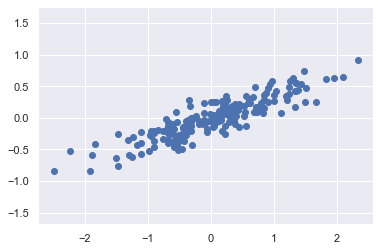

In [2]:
# 주성분 분석 소개
# 차원 축소를 위한 빠르고 유연한 비지도 학습 기법 => 2차원 데이터세트 시각화
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis("equal");

In [3]:
"""
주성분 분석에서는 이 관계가 데이터의 주축(principal axes)의 목록을 구하고
그 축을 사용해 데이터세트를 설명함으로써 정량화
"""
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [4]:
print(pca.components_, "\n") # 성분(components)
print(pca.explained_variance_) # 설명 분산(explained variance)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]] 

[0.7625315 0.0184779]


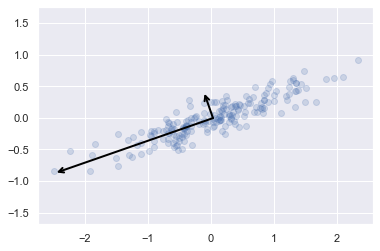

In [5]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle="->",
                      linewidth=2,
                      color="black",
                      shrinkA=0,
                      shrinkB=0)
    ax.annotate("", v1, v0, arrowprops=arrowprops)
    
# 데이터 플로팅
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis("equal");

# 데이터 축에서 주축으로의 변환은 유사 변환(affine transformation)

In [6]:
# PCA 응용: 차원 축소
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape: ", X.shape)
print("transformed shape: ", X_pca.shape)

original shape:  (200, 2)
transformed shape:  (200, 1)


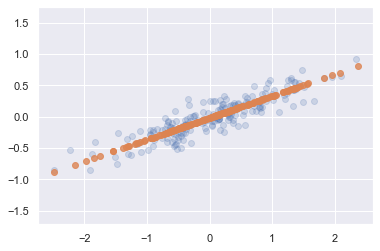

In [7]:
X_new = pca.inverse_transform(X_pca) # 차원 축소된 데이터를 역변환
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis("equal");

"""
가장 중요하지 않은 주축을 따르는 정보는 삭제하고 가장 높은 분산을 갖는 데이터의 성분만 보존
잘려나간 분산의 비율은 이 차원 축소에서 얼마나 많은 "정보"가 버려지는지 대략적으로 측정한 척도
데이터 차원을 50%로 줄였음에도 데이터 점들 사이의 전반적인 관계는 대부분 보존
""";

In [8]:
# PCA를 사용한 시각화: 손으로 쓴 숫자
# 랜덤 포레스트에서 본 숫자 데이터에 PCA를 적용
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape # 8x8 픽셀 이미지 => 데이터는 64차원

(1797, 64)

In [9]:
pca = PCA(n_components=2)
projected = pca.fit_transform(digits.data) # 기존 레이블을 참조하지 않은 비지도 방식
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


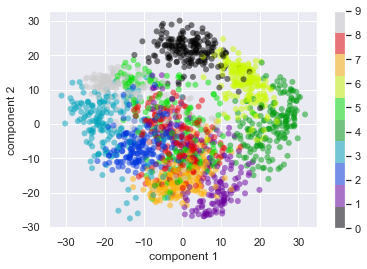

In [10]:
# 플로팅
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor="none", alpha=0.5,
            cmap=plt.cm.get_cmap("nipy_spectral", 10))
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.colorbar();

"""
이 점들은 가장 큰 분산을 가지는 방향을 따라 각 데이터 점을 사용한 것
""";

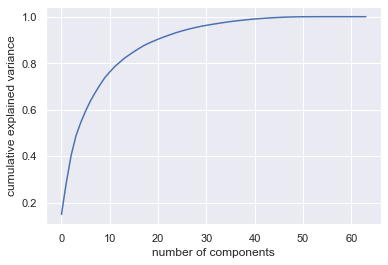

In [11]:
# 성분은 무엇을 의미하는가?
"""
x = [x1, x2, x3, ..., x64]

1) 이미지를 구성하기 위해 벡터의 각 요소를 그 요소가 나타내는 픽셀로 곱한뒤 그 결과를 더해 이미지를 구축
image(x) = x1*pixel1 + x2*pixel2 + x3*pixel3 + ... + x64*pixel64

2) 다른 기저 함수 사용
image(x) = mean + x1*basis1 + x2*basis2 + x3*basis3 ...

PCA => 최적의 기저 함수를 선택하는 절차

성분의 개수 선택
=> 성분 개수의 함수로 누적 설명 분산 비율(explained variance ratio)을 보고 결정
"""

pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance");

# 첫 10개의 성분이 분산의 약 75%를 포함
# 분산의 100%에 달하는 것을 설명하려면 약 50개의 성분이 필요

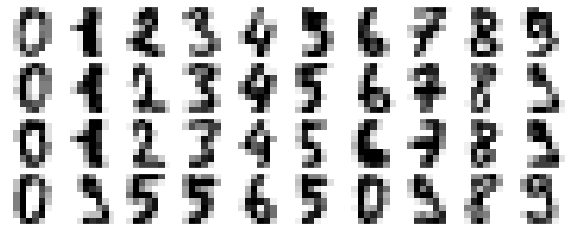

In [12]:
# PCA 응용: 노이즈 필터링
# 주성분의 가장 큰 부분집합만 사용해 데이터를 재구성하면 신호는 유지하고 노이즈는 거러낼 수 있다
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={"xticks":[], "yticks":[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap="binary", interpolation="nearest",
                  clim=(0, 16))
    
plot_digits(digits.data)

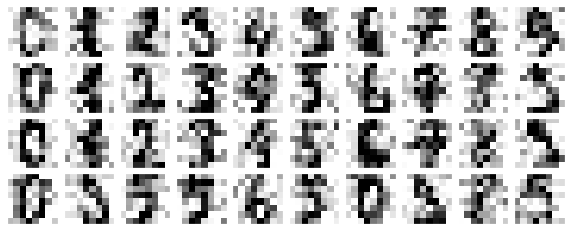

In [13]:
# 임의의 노이즈를 추가해 다시 플로팅
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [14]:
# PCA가 분산의 50%를 보존하는 조건으로 노이즈 섞인 데이터를 훈련
pca = PCA(0.50).fit(noisy)
pca.n_components_ # 분산의 50%는 12개의 주성분

12

(1797, 12) 

(1797, 64)


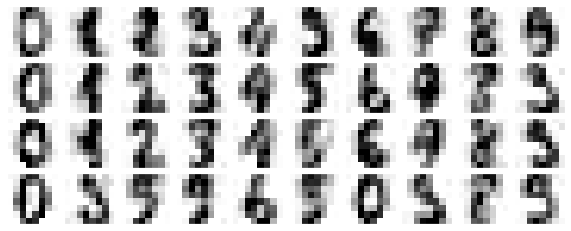

In [15]:
# 성분들을 계산한 다음, 변환의 역을 사용해 필터링 된 숫자를 재구성
components = pca.transform(noisy)
print(components.shape, "\n")
filtered = pca.inverse_transform(components)
print(filtered.shape)

plot_digits(filtered)

In [16]:
# 예제: 고유얼굴
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [17]:
# RandomizedPCA => 처음 N개의 주성분을 근사하게 계산해내는 임의화된 메서드
# 첫 150개의 성분
from sklearn.decomposition import PCA
pca = PCA(n_components=150, svd_solver="randomized")
pca.fit(faces.data)

PCA(n_components=150, svd_solver='randomized')

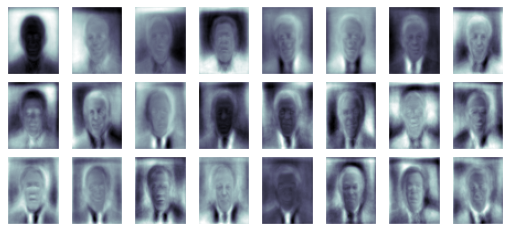

In [18]:
# 처음 몇 개의 주성분과 관련된 이미지
# 고유벡터(eigenvectors), 고유얼굴(eigenfaces)
fig, ax = plt.subplots(3, 8, figsize=(9,4),
                       subplot_kw={"xticks":[], "yticks":[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(ax.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap="bone")

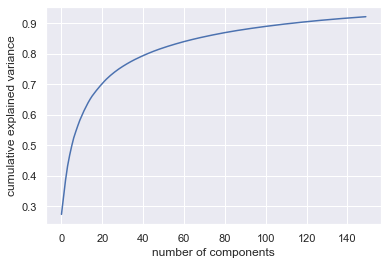

In [19]:
# 성분들의 누적 분산 플로팅
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance");

# 150개의 성분이면 분산의 90% 이상을 설명할 수 있음

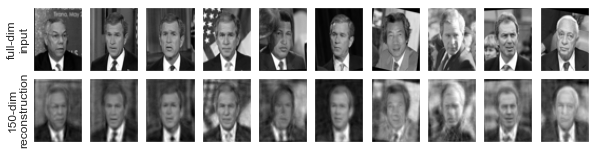

In [20]:
# 성분과 사영된 얼굴 계산
pca = PCA(n_components=150, svd_solver="randomized").fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

# 결과 플로팅
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={"xticks":[], "yticks":[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap="binary_r")
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap="binary_r")

ax[0, 0].set_ylabel("full-dim\ninput")
ax[1, 0].set_ylabel("150-dim\nreconstruction");

# PCA 특징 추출이 데이터 차원을 거의 1/20로 줄였음에도 사영된 이미지는 해당 이미지의 눈으로 인식 가능